# L1: Information Retrieval

In this lab you will apply basic techniques from information retrieval to implement the core of a minimalistic search engine. The data for this lab consists of a collection of app descriptions scraped from the [Google Play Store](https://play.google.com/store/apps?hl=en). From this collection, your search engine should retrieve those apps whose descriptions best match a given query under the vector space model.

## Data set

The app descriptions come in the form of a compressed [JSON](https://en.wikipedia.org/wiki/JSON) file. Start by loading this file into a [Pandas](https://pandas.pydata.org) [DataFrame](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#dataframe).

In [1]:
import bz2
import pandas as pd

with bz2.open("app-descriptions.json.bz2") as source:
    df = pd.read_json(source)

In Pandas, a DataFrame is a table with indexed rows and labelled columns of potentially different types. Data in a DataFrame can be accessed in various ways, including by row and by column. To give an example, the code in the next cell shows rows 200–204:

In [2]:
df[200:205]

,description,name
200,Introducing the best Brick Breaker game that e...,Brick Breaker Star: Space King
201,Classic Brick Game!\n\nBrick Classic is a popu...,Brick Classic - Brick Game
202,Bricks Breaker - Glow Balls is a addictive and...,Bricks Breaker - Glow Balls
203,How to play\n- The ball flies to wherever you ...,Bricks Breaker Quest
204,Fight brave soldiers from around the globe on ...,Brothers in Arms® 3


As you can see, there are two labelled columns: `name` (the name of the app) and `description` (a textual description). The code in the next cell shows how to acess fields from the description column.

In [3]:
df["description"][200:205]

200    Introducing the best Brick Breaker game that e...
201    Classic Brick Game!\n\nBrick Classic is a popu...
202    Bricks Breaker - Glow Balls is a addictive and...
203    How to play\n- The ball flies to wherever you ...
204    Fight brave soldiers from around the globe on ...
Name: description, dtype: object

## Problem 1: Preprocessing

Your first task is to implement a preprocessor for your search engine. In the vector space model, *preprocessing* refers to any kind of **transformation** that is applied **before a text is vectorized**. Here you can restrict yourself to a very simple preprocessing: tokenization, stop word removal, and lemmatization.

To implement your preprocessor, you can use [spaCy](https://spacy.io). Make sure that you read the [Linguistic annotations](https://spacy.io/usage/spacy-101#annotations) section of the spaCy&nbsp;101; that section contains all the information that you need for this problem (and more).

Implement your preprocessor by completing the skeleton code in the next cell, adding additional code as you feel necessary.

In [48]:
# import the package
import spacy

#### Thinking and general information:
## Start

# take the spacy.load outside the function to speed up the preprocessing
# therways it would need to load for every function call 

# Disabling and modifying pipeline components
# If you don’t need a particular component of the pipeline – for example, the tagger or the parser, 
# you can disable loading it. This can sometimes make a big difference and improve loading speed

# to speed up, disable:
# "tagger", "parser", "entityrecognizer"

## End

nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser", "entityrecognizer"])

def preprocess(text):
    doc = nlp(text)
    
    # init an list to save the return
    result = []
    
    # in the function we have to: 
    # tokeniz the text: 
    # - Special-case rule to split a string into several tokens or prevent a token from being split when
    # remove stop words: 
    # - Is the token part of a stop list, i.e. the most common words of the language?
    # lemma:
    # - The base form of the word
    # is alpha: 
    # - Is the token an alpha character?
    
    for token in doc:
        # take just token without stop words & just alpha character 
        if token.is_stop == False and token.is_alpha == True: 
                result.append(token.lemma_)
    return result

Your implementation should conform to the following specification:

<strong>preprocess</strong> (<em>text</em>)

> Preprocesses given text by tokenizing it, removing any stop words, replacing each remaining token with its lemma (base form), and discarding all lemmas that contain non-alphabetical characters. Returns the list of remaining lemmas (represented as strings).

**Tip:** To **speed up the preprocessing**, you can **disable loading** those spaCy components that you **do not need**, such as the part-of-speech **tagger, parser,** and named **entity recognizer**. See [here](https://spacy.io/usage/processing-pipelines#disabling) for more information about this.

Test your implementation by running the following cell:

In [49]:
preprocess("Apple is looking at buying U.K. startup for $1 billion")

['Apple', 'look', 'buy', 'startup', 'billion']

This should give the following output:


## Problem 2: Vectorizing

Your next task is to **vectorize the data** – and more specifically, to **map** each app description to a **tf–idf vector**. For this you can use the [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) class from [scikit-learn](https://scikit-learn.org/stable/). Make sure to specify your preprocessor from the previous problem as the `tokenizer` &ndash; not the `preprocessor`! &ndash; for the vectorizer.

### The Term frequency

Before we are able to compute the tf-idf (Term frequency-inverse document frequency), we need to compute the tf (term frequency)

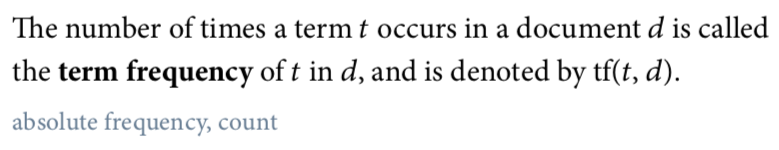

In [65]:
from IPython.display import Image
Image(filename = "tf.png", width=600, height=600)

### The Term frequency-inverse document frequency

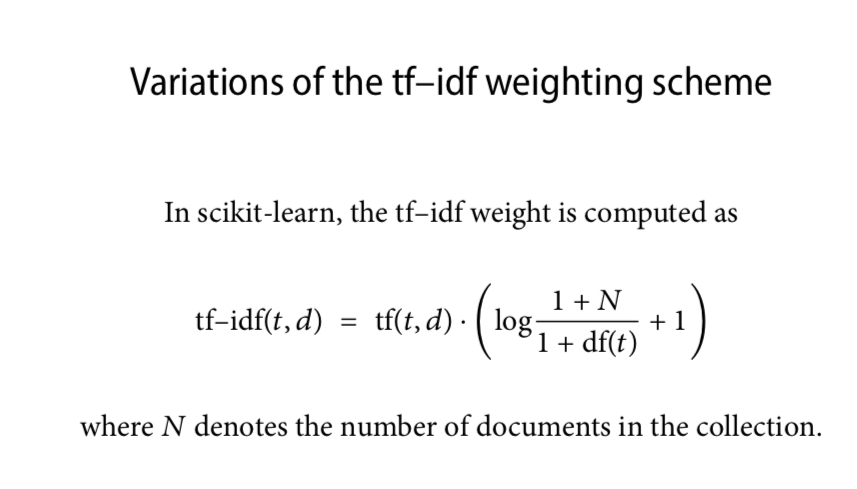

In [59]:
from IPython.display import Image
Image(filename = "tf-idf-sklearn.png", width=600, height=600)

In [50]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

#### Thinking and general information:
## Start

# term frequency - inverse document frequency 
# see picture above

## sklearn.feature_extraction.text.TfidfVectorizer
# Convert a collection of raw documents to a matrix of TF-IDF features.
# Equivalent to CountVectorizer followed by TfidfTransformer.

### Modify the parameter 
## - tokenizer
# Override the string tokenization step while preserving the preprocessing and n-grams generation steps. 
# in the previous task we have created a preproccesing function, this will be used now
## - use_idf 
# default = True
# - This are the only parameter we have to adjust

## output of the TfidfTransformer function is an object with:
# vocabulary_ : dict - A mapping of terms to feature indices.
# idf_ : array, shape (n_features) - The inverse document frequency (IDF) vector; only defined if use_idf is True.

## End

vectorizer = TfidfVectorizer(tokenizer = preprocess, use_idf=True)

# fit_transform(self, raw_documents[, y]) Learn vocabulary and idf, return term-document matrix.
# this steps generates word counts for the words in your docs
X = vectorizer.fit_transform(df["description"])


**Here I gonna do some testing of the vectorizer object**

In [80]:
vectorizer.build_tokenizer

<bound method VectorizerMixin.build_tokenizer of TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function preprocess at 0x11623f0d0>, use_idf=True,
        vocabulary=None)>

In [67]:
help(vectorizer.fit_transform)

Help on method fit_transform in module sklearn.feature_extraction.text:

fit_transform(raw_documents, y=None) method of sklearn.feature_extraction.text.TfidfVectorizer instance
    Learn vocabulary and idf, return term-document matrix.
    
    This is equivalent to fit followed by transform, but more efficiently
    implemented.
    
    Parameters
    ----------
    raw_documents : iterable
        an iterable which yields either str, unicode or file objects
    
    Returns
    -------
    X : sparse matrix, [n_samples, n_features]
        Tf-idf-weighted document-term matrix.



In [72]:
# chekc the returns of the fitted vectorizer
vectorizer.idf_
# this is a array of all the idf values of the fitted model
# we see that if the check the length 

array([6.77765232, 7.69394306, 7.69394306, ..., 7.69394306, 7.69394306,
       7.69394306])

In [73]:
len(vectorizer.idf_)

20555

In [68]:
help(vectorizer.transform)

Help on method transform in module sklearn.feature_extraction.text:

transform(raw_documents, copy=True) method of sklearn.feature_extraction.text.TfidfVectorizer instance
    Transform documents to document-term matrix.
    
    Uses the vocabulary and document frequencies (df) learned by fit (or
    fit_transform).
    
    Parameters
    ----------
    raw_documents : iterable
        an iterable which yields either str, unicode or file objects
    
    copy : boolean, default True
        Whether to copy X and operate on the copy or perform in-place
        operations.
    
    Returns
    -------
    X : sparse matrix, [n_samples, n_features]
        Tf-idf-weighted document-term matrix.



In [75]:
vectorizer.get_feature_names()

['-PRON-',
 '10',
 '100',
 '2',
 '20',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'TRUE',
 'aa',
 'aaa',
 'aac',
 'aagbi',
 'aang',
 'aat',
 'ab',
 'abandon',
 'abbiamo',
 'abbott',
 'abby',
 'abc',
 'abcd',
 'abcmouse',
 'abcs',
 'abcsong',
 'abdominal',
 'abduct',
 'abel',
 'aberto',
 'abg',
 'abi',
 'abide',
 'ability',
 'able',
 'aboard',
 'abomination',
 'abondoned',
 'abort',
 'abraham',
 'abrechnung',
 'abroad',
 'absolut',
 'absolute',
 'absolutely',
 'absorb',
 'absorber',
 'abstract',
 'abstraction',
 'absurd',
 'abundance',
 'abundant',
 'abuse',
 'abusive',
 'abvgdeyka',
 'abyss',
 'ac',
 'aca',
 'academic',
 'academy',
 'academys',
 'acapella',
 'accade',
 'accedi',
 'accelerate',
 'acceleration',
 'accelerator',
 'accelerometer',
 'accent',
 'accept',
 'acceptable',
 'acceptance',
 'access',
 'accessibility',
 'accessible',
 'accessorize',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'acclaim',
 'accompaniment',
 'accompany',
 'accomplish',
 'accomplishment',
 'a

In [77]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': <function __main__.preprocess>,
 'use_idf': True,
 'vocabulary': None}

Test your implementation by running the following cell:

In [51]:
X.shape

(1614, 20555)

This should show the dimensions of the matrix `X` to be 1614 × 20651.

<strong>Question 1 - Problem 2: Vectorizing</strong> 

> Why is the dimension of my matrix not equal 1614 × 20651?
I have a difference of:

In [54]:
20651 - X.shape[1]

96

** Here I gonna analyze the fitted object**

In [84]:
X.get_shape()

(1614, 20555)

In [89]:
print(X.max(), X.min())

0.946330426016901 0.0


In [93]:
help(X.data)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

## Problem 3: Finding terms with low/high idf

Recall that the inverse document frequency (idf) of a term is the lower the more documents from a given collection the term appears in. To get a better understanding for this concept, your next task is to write code to find out which terms have the lowest/highest idf with respect to the app descriptions.

Start by sorting the terms in increasing order of idf, breaking ties by falling back on alphabetic order.

In [60]:
# create a data frame ob the names of the model parameteres and its values

# get_feature_names(self) Array mapping from feature integer indices to feature name
# idf_ : array, shape (n_features) - The inverse document frequency (IDF) vector; only defined if use_idf is True.
terms = pd.DataFrame({"names": vectorizer.get_feature_names(), "idf_weights": vectorizer.idf_})
 
# sort
# want values sorted by values and if values are the same by alphabet 
terms = terms.sort_values(by=["idf_weights", "names"], ascending=[False, True])

Now, print out the 10 terms at the top/end of the sorted list:

In [61]:
# top 10
terms[:10]

,names,idf_weights
1,10,7.693943
2,100,7.693943
4,20,7.693943
6,5,7.693943
7,6,7.693943
9,8,7.693943
10,9,7.693943
12,aa,7.693943
15,aagbi,7.693943
16,aang,7.693943


<strong>Question 2 - Problem 3: Finding terms with low/high idf </strong> 

> Why are number in the list?
They should not be there anymore, because of the **token.is_alpha** statement of the preprocessing step.

In [62]:
# bottom 10
terms[-10:]

,names,idf_weights
16905,well,1.872378
5681,fun,1.859132
677,app,1.838871
15423,time,1.788581
17104,world,1.781792
10198,new,1.665665
5582,free,1.584695
5193,feature,1.472359
11480,play,1.412611
5831,game,1.296180


## Problem 4: Retrieving

To complete the search engine, your last task is to write a function that returns the most relevant app descriptions for a given query. An easy way to do solve this task is to use scikit-learn&rsquo;s [NearestNeighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html) class. That class implements unsupervised nearest neighbours learning, and allows you to easily find a predefined number of app descriptions whose vector representations are closest in distance to the query vector.

In [36]:
from sklearn.neighbors import NearestNeighbors

# nearest neighors
# create model and fit by X
# X = vectorizer.fit_transform 
# Learn vocabulary and idf, return term-document matrix.
neigh = NearestNeighbors(metric='cosine') # default n_neighbors=5, radius=1.0, cosine as algorithm
neigh.fit(X)

def search(query):
    
    # Transform documents to document-term matrix.
    # Uses the vocabulary and document frequencies (df) learned by fit (or fit_transform).
    query_vt = vectorizer.transform([query])
    
    # using the fitted model
    # kneighbors(self[, X, n_neighbors, …]) Finds the K-neighbors of a point.
    # Finds the K-neighbors of a point. Returns indices of and distances to the neighbors of each point.
    # we are not interested in the distance return_distance=False, we want the indexes of the neares neighbors
    
    # Input X: The query point or points. If not provided, neighbors of each indexed point are returned. 
    # In this case, the query point is not considered its own neighbor.
    knn = neigh.kneighbors(query_vt,10, return_distance=False)[0] 
    # output is a nested array of indexes
    # [0] because we had a nested array 
    
    # use the indexes generated by knn and plug into data frame to generate a list of 10 best results
    res = df.iloc[knn]

    return res

** Check out the transformed vectorizer **

In [146]:
query_vt = vectorizer.transform(["ball master"])

In [147]:
query_vt.get_shape()

(1, 20555)

In [148]:
print(query_vt)
# Output of the transform function: Tf-idf-weighted document-term matrix.

  (0, 9247)	0.623616930961192
  (0, 1202)	0.7817300834805734


** Checking out the fitted neigbor object **

In [101]:
neigh.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'cosine',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

In [103]:
neigh.leaf_size

30

In [116]:
neigh_test = NearestNeighbors(n_neighbors = 5, metric='cosine') # default n_neighbors=5, radius=1.0, cosine as algorithm


In [117]:
neigh_test.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'cosine',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

In [149]:
query_vt = vectorizer.transform(["ball master"])
knn_test = neigh.kneighbors(query_vt,10, return_distance=False)

In [150]:
knn_test
# output is a nested array of indexes / Indices of the nearest points in the population matrix.

array([[ 124,  304,  360,  159,  465,  705,  649,  122, 1133, 1159]])

In [151]:
df[120:125]

,description,name
120,"Ball Paint is a new addictive 3D game, featuri...",Ball Paint
121,Ready to start matching and popping some ballo...,Balloon Paradise - Halloween Games Puzzle Match 3
122,"Hold the screen to aim, swipe the ball to the ...",Balls Bricks Breaker
123,Balls Bricks Breaker 3 - Stack Blast is a simp...,Balls Bricks Breaker - Stack Blast
124,Balls & Balls is a hyper casual puzzle game th...,Balls Master


**Cosine similarity**

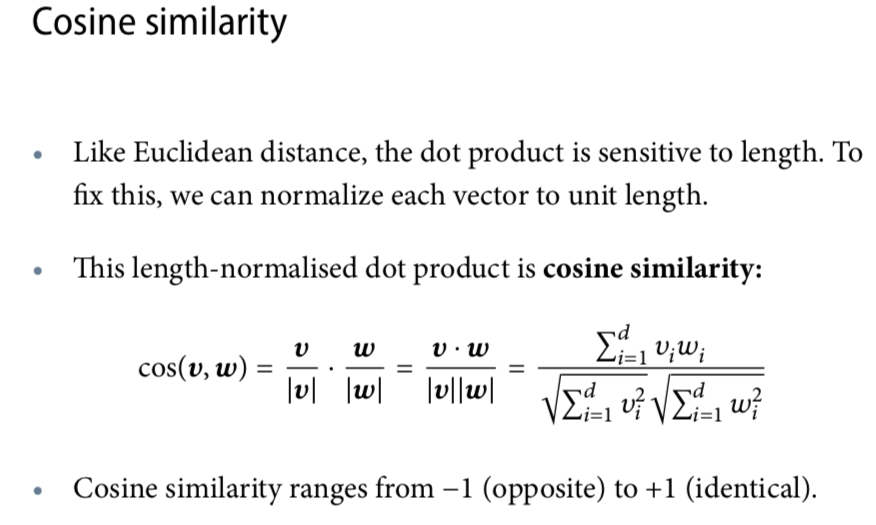

In [129]:
from IPython.display import Image
Image(filename = "cosine_similarity.png", width=600, height=600)

Your implementation should conform to the following specification:

<strong>search</strong> (<em>query</em>)

> Returns the 10 app descriptions most similar (in terms of cosine similarity) to the given query as a Pandas DataFrame.

Test your implementation by running the following cell:

In [37]:
search("dodge trains")

,description,name
1301,DASH as fast as you can! \nDODGE the oncoming ...,Subway Surfers
1300,"Subway princess runner, Bus run, forest rush w...",Subway Princess Runner
1428,Master and manage the chaos of international r...,Train Conductor World
998,2M+ Downloads All Over The World!\n\n* IGN Nom...,No Humanity - The Hardest Game
1394,All aboard for an adventure around the world!\...,Tiny Rails
1429,"🚂 BabyMagica ""Train for Animals"" is a educatio...",Train for Animals - BabyMagica free
1168,Are you ready for a thrilling ride?\n\nRush th...,Rush
1077,"Polar Flow is a sports, fitness, and activity ...",Polar Flow – Sync & Analyze
1286,Track your fitness with Strava activity tracke...,"Strava: Track Running, Cycling & Swimming"
1465,Warning! Virus invasion! Destroy them with you...,Virus War - Space Shooting Game


The top hit in the list should be *Subway Surfers*.

## Problem 5: Keyword extraction

A simple method for extracting salient keywords from a document is to pick the $k$ terms with the highest tf–idf value. Your last task in this lab is to implement this method. More specifically, we ask you to implement a function `keywords` that extracts keywords from a given text.

In [38]:
def keywords(text, n=10):
    
    # transform the string to vector
    X = vectorizer.transform([text])
    
    # create a data frame 
    X_df = pd.DataFrame(X.toarray())
    X_df_t = X_df.transpose()
    X_df_sorted = X_df_t.sort_values(by = 0, ascending=False)
    
    z = X_df_sorted.index.tolist()[0:10]
    res = [vectorizer.get_feature_names()[i] for i in z]
    return [res]

Your implementation should conform to the following specification:

<strong>keywords</strong> (<em>text</em>, <em>n</em> = 10)

> Returns a list with the $n$ (default value: 10) most salient keywords from the specified text, as measured by their tf–idf value relative to the collection of app descriptions.

Test your implementation by running the following cell:

In [39]:
print(keywords(df["description"][1428]))

[['train', 'railroad', 'railway', 'rail', 'chaos', 'crash', 'railyard', 'overcast', 'tram', 'haul']]


This should give the following output:

<strong>Note</strong>

> The function output is not exactly the same as expected!

In [155]:
# Print the whole sting - description of the row 1428
df["description"][1428]

"Master and manage the chaos of international railway traffic as the ultimate railroad tycoon. Build the rail network of your dreams; lay rails and solve the railroad puzzle with branching and forking roads at every turn. Become the richest manager and pick your path, do you optimise to the micro level, planning routes and managing the timetable, or sit idle letting your business keep earning while you sleep! \n\nGet in the driver's seat and take passengers to their destinations, dropping them at stations, and haul goods to ports and factories. Control and conduct the trains, marshalling them through tunnels, around obstacles and over mountains in this thrilling, fast-paced action arcade videogame. Connect your express trains across the railyard at breakneck speed. Try to avoid crashing, but I bet you can’t. You’ll need snappy strategy to master the chaos! Be on high-alert for explosive crashes, near-misses and split second situations.\n\nRing the bell and toot your horn while playing 

In [156]:
# transform the string to vector
X_test = vectorizer.transform([df["description"][1428]])

In [159]:
print(X_test)
# this result need to be sorted

  (0, 17104)	0.02881447222737325
  (0, 16870)	0.07173483419815076
  (0, 16512)	0.10665719771649418
  (0, 15987)	0.05606878203067416
  (0, 15900)	0.054602753832444235
  (0, 15894)	0.08564568411152965
  (0, 15849)	0.04900816526028329
  (0, 15834)	0.10010016915580998
  (0, 15772)	0.03931730292711903
  (0, 15617)	0.12442354063938198
  (0, 15609)	0.34908867975583996
  (0, 15602)	0.07112451187071857
  (0, 15517)	0.11321422627717836
  (0, 15432)	0.12442354063938198
  (0, 15315)	0.11786651207869778
  (0, 15294)	0.0662491656742112
  (0, 14557)	0.04939414115346226
  (0, 14492)	0.05471092562200091
  (0, 14363)	0.07958628319056754
  (0, 14225)	0.08718700433515339
  (0, 14167)	0.055489091928797876
  (0, 14024)	0.05315974164556016
  (0, 13942)	0.11321422627717836
  (0, 13829)	0.07407294721378502
  (0, 13704)	0.07768154043140277
  :	:
  (0, 4247)	0.07480814755358413
  (0, 4226)	0.05537560639470564
  (0, 3888)	0.11786651207869778
  (0, 3776)	0.08062997577446919
  (0, 3375)	0.08801650011554255
  (0, 32

In [174]:
# transform the string to vector
X_test = vectorizer.transform([df["description"][1428]])

# create a data frame 
X_df_test = pd.DataFrame(X_test.toarray())
X_df_t_test = X_df_test.transpose()
X_df_sorted_test = X_df_t_test.sort_values(by = 0, ascending=False)
    
z = X_df_sorted_test.index.tolist()[0:15]
res = [vectorizer.get_feature_names()[i] for i in z]

In [179]:
print(X_df_sorted_test[1:15])

              0
12181  0.213314
12182  0.213314
12180  0.196793
2458   0.177782
3220   0.157212
12183  0.124424
10858  0.124424
15617  0.124424
6598   0.124424
15432  0.124424
8797   0.124424
15315  0.117867
1913   0.117867
3888   0.117867


In [180]:
print(z)

[15609, 12181, 12182, 12180, 2458, 3220, 12183, 10858, 15617, 6598, 15432, 8797, 15315, 1913, 3888]


In [181]:
print(res)

['train', 'railroad', 'railway', 'rail', 'chaos', 'crash', 'railyard', 'overcast', 'tram', 'haul', 'timetable', 'locomotive', 'thunderstorm', 'breakneck', 'diesel']


How the result should look like:
['train', 'railroad', 'railway', 'rail', 'chaos', 'crash', 'tram', 'haul', 'overcast', 'railyard']

**Different order of the words, because the tf-idf values are the same for index 7 to 11. **

The order is correct until index 6 (crash).

<div class="alert alert-info">
    Please read the General information section on the lab web page before submitting this notebook!
</div>